# Brain Tumor Segmentation using SLIC

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png', cv2.IMREAD_GRAYSCALE)

# #simple global thresholding
# ret,th1 = cv2.threshold(img,90,255,cv2.THRESH_BINARY)

# plt.figure(figsize=(12,6))
# plt.subplot(121), plt.imshow(img,cmap='gray')
# plt.title('Grayscale Image')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122), plt.imshow(th1,cmap='gray')
# plt.title('Binary Image (Threshold: '+str(ret)+')')
# plt.xticks([]),plt.yticks([])
# plt.show()

In [3]:
# # morphological operations
# kernel = np.ones((5, 5), np.uint8)
# closing = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel, iterations=7)

# # Display the original and the result
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# plt.imshow(th1, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Morphological Opening')
# plt.imshow(closing, cmap='gray')
# plt.axis('off')

# plt.show()

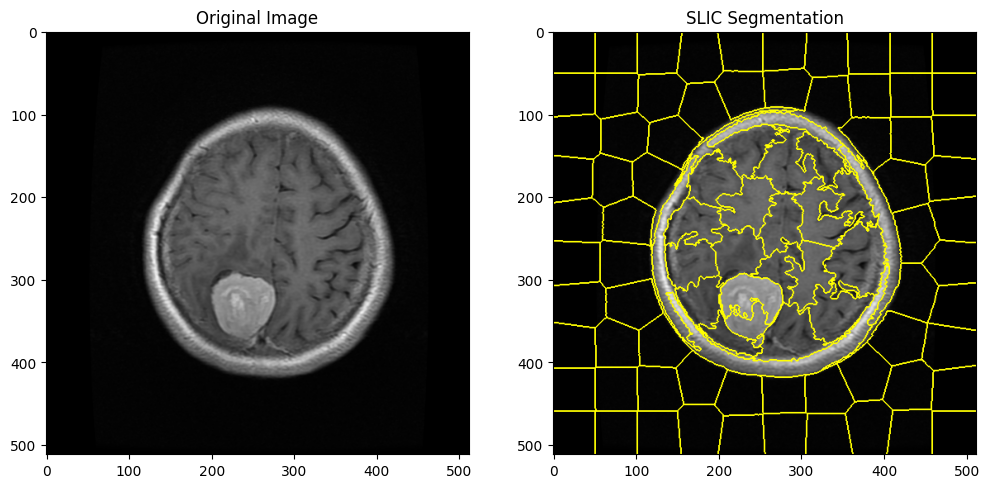

In [4]:
import cv2
import numpy as np
from skimage.segmentation import mark_boundaries
from skimage.segmentation import slic
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png', cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB (for display with matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform SLIC segmentation
segments = slic(img, n_segments=100, compactness=10)

# Create a mask using the segments
mask = np.zeros_like(img)
for seg_val in np.unique(segments):
    mask[segments == seg_val] = np.mean(img[segments == seg_val], axis=(0, 1))

# Display the original image and SLIC segmentation result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')

ax[1].imshow(mark_boundaries(img_rgb, segments))
ax[1].set_title('SLIC Segmentation')

plt.show()


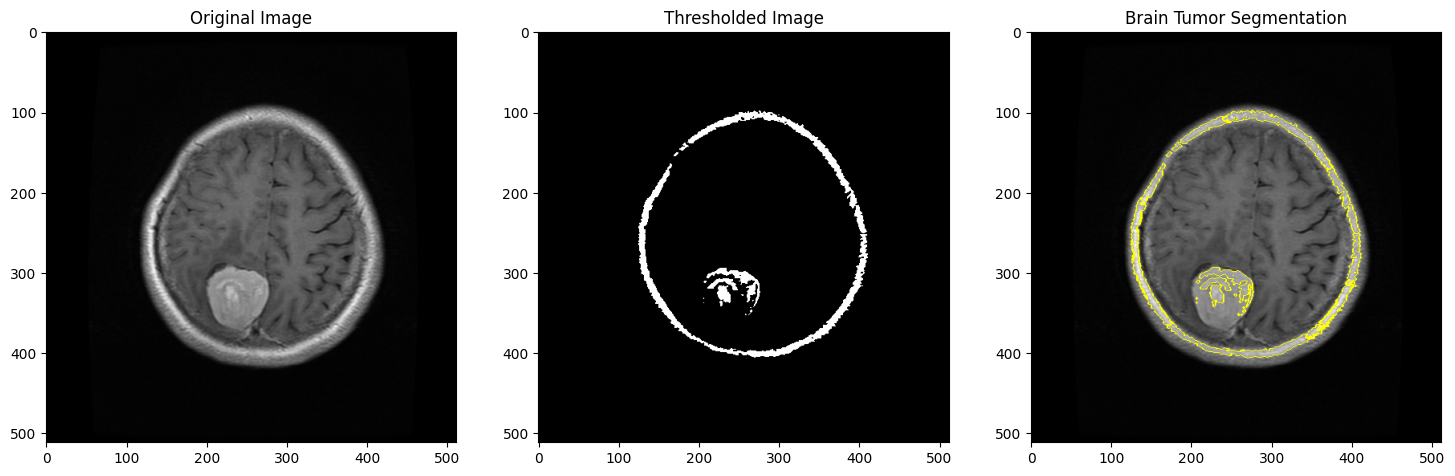

In [5]:
import cv2
import numpy as np
from skimage.segmentation import slic, mark_boundaries
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png', cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB (for display with matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply threshold to create a binary mask
_, binary_mask = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

# Perform SLIC segmentation on the thresholded image
segments = slic(img * binary_mask[:, :, None], n_segments=100, compactness=10)

# Apply the SLIC segments to the binary mask
tumor_mask_segments = np.zeros_like(segments)
tumor_mask_segments[binary_mask > 0] = segments[binary_mask > 0]

# Display the original image, thresholded image, SLIC segments, and the segmented tumor
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.imshow(img_rgb)
ax1.set_title('Original Image')

ax2.imshow(binary_mask, cmap='gray')
ax2.set_title('Thresholded Image')

ax3.imshow(mark_boundaries(img_rgb, tumor_mask_segments))
ax3.set_title('Brain Tumor Segmentation')

plt.show()
